In [1]:
!pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git


  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to c:\users\chamy\appdata\local\temp\pip-req-build-82fceo1v
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit ca2797e9270195313423324c9d0f205f6cbb3d28
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git 'C:\Users\chamy\AppData\Local\Temp\pip-req-build-82fceo1v'


In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from collections import defaultdict
from mpl_toolkits.mplot3d import axes3d
import gym
import sys

In [3]:
import os, sys
import gymnasium as gym
import time

import text_flappy_bird_gym

if __name__ == "__main__":
    # initiate environment
    env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)
    obs = env.reset()

    # iterate
    while True:
        # Select next action
        action = (
            env.action_space.sample()
        )  # for an agent, action = agent.policy(observation)

        # Appy action and return new observation of the environment
        obs, reward, done, _, info = env.step(action)

        # Render the game
        os.system("clear")
        sys.stdout.write(env.render())
        time.sleep(0.2)  # FPS

        # If player is dead break
        if done:
            break

    env.close()

Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                  | ]
[                  | ]
[                    ]
[                    ]
[                    ]
[                    ]
[      @           | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=12,dy=2)
Text Flappy Bird!
Score: 0
----------------------
[                 |  ]
[                 |  ]
[                 |  ]
[                    ]
[                    ]
[                    ]
[                    ]
[                 |  ]
[                 |  ]
[      @          |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=11,dy=4)
Text Flappy Bird!
Score: 0
----------------------
[       

# EXPECTED SARSA

In [26]:
# Import the necessary libraries

# General libraries
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import sys
from collections import defaultdict

# Game related libraries
import gymnasium as gym
import text_flappy_bird_gym
import IPython

# Visualization
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:33<00:00, 294.94it/s]


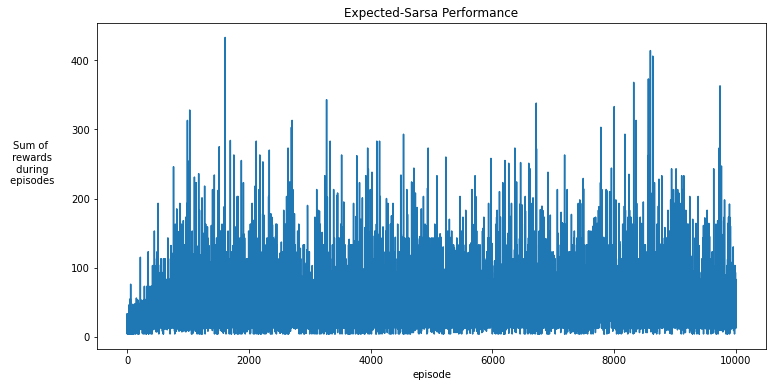

In [45]:
class ExpectedSarsaAgent():
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            eps_decay (float): The decay rate of the epsilon parameter,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.epsilon = agent_init_info["epsilon"]
        self.eps_decay = agent_init_info["eps_decay"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = defaultdict(lambda: np.zeros(2))  

    def agent_act(self,state):
        # Define the function to generate 𝜖 -greedy action

        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(self.q[state])
        return action

    def agent_step(self):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the current state
            action (int): current action
        """
        
        # Perform an update 
        # Expected Sarsa: Vs' = SUMa(policy(s',a)*Q(s',a))
        # Q(s,a) = Q(s,a) + step_size * (reward + epsilon*Vs' - Q(s,a))

        expected_q = 0
        max_q = np.max(self.q[next_state])

        pi = np.ones(self.num_actions) * self.epsilon / self.num_actions + (self.q[next_state] == max_q) * (1 - self.epsilon) / np.sum(self.q[next_state] == max_q) # Compute the probability of choosing the greedy action
           
        expected_q = np.sum(self.q[next_state] * pi)
        self.q[state][action] += self.step_size * (reward + self.discount * expected_q - self.q[state][action])

        # Decay for the epsilon
        self.epsilon = max(self.epsilon * self.eps_decay, 0.03) 

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)
    


# Baseline
agent = ExpectedSarsaAgent()
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = [] # Contains sum of rewards during episode
all_scores = [] # Contains the scores for each run
agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": 1.0,"seed":42}
agent.agent_init(agent_info)

# Set the value that is big enough to see the converge
num_episodes = 10000 # The number of episodes in each run

for episode in tqdm(range(num_episodes)):

    # Initialize done to False
    done = False

    reward_sums = []

    state, info = env.reset()
    while not done:
        action = agent.agent_act(state)
        next_state, reward, done, _, info = env.step(action)
        #For SARSA to acquire the on-policy next action
        next_action = agent.agent_act(next_state)
        
        agent.agent_step()
        state = next_state

        reward_sums.append(reward)

        # If terminal state
        if done:
            break

    all_reward_sums.append(np.sum(reward_sums))
    all_scores.append(info["score"])

Esarsa_learning_svf = agent.q

# Plot the results
# print average reward
print("Average reward: ", np.mean(all_reward_sums))
x = np.arange(num_episodes)
plt.figure(figsize=(12, 6))
plt.plot(x, all_reward_sums)
plt.title("Expected-Sarsa Performance")
plt.xlabel("episode")
plt.ylabel("Sum of\n rewards\n during\n episodes",rotation=0, labelpad=40)
plt.show()
     


# SARSA LAMBDA

100%|██████████| 10000/10000 [02:30<00:00, 66.57it/s]


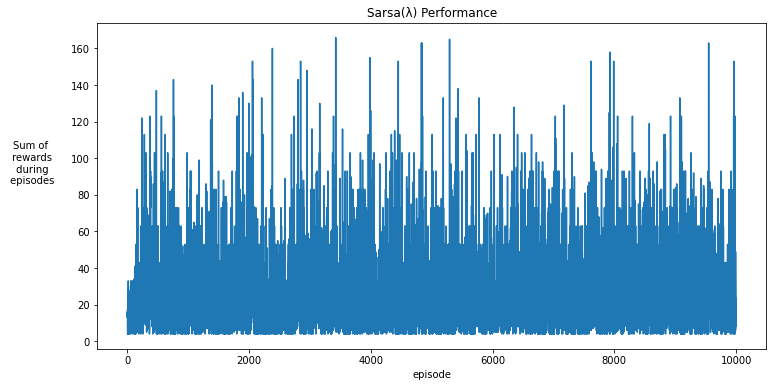

In [4]:
import numpy as np
from collections import defaultdict

class SarsaLambdaAgent:
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict): The parameters used to initialize the agent. The dictionary contains:
        {
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            eps_decay (float): The decay rate of the epsilon parameter,
            step_size (float): The step-size,
            discount (float): The discount factor,
            trace_decay (float): The decay rate of the eligibility trace,
            seed (int): The seed for the random number generator.
        }
        
        """
        self.num_actions = agent_init_info["num_actions"]
        self.epsilon = agent_init_info["epsilon"]
        self.eps_decay = agent_init_info["eps_decay"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.trace_decay = agent_init_info["trace_decay"]
        self.rand_generator = np.random.RandomState(agent_init_info["seed"])
        
        # Initialize action-value estimates and eligibility traces
        self.q = defaultdict(lambda: np.zeros(self.num_actions))
        self.e = defaultdict(lambda: np.zeros(self.num_actions))  

    def agent_act(self, state):
        """Choose an action based on ε-greedy policy."""
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(self.q[state])
        return action

    def agent_step(self, reward, state, action, next_state, next_action):
        """A step taken by the agent."""
        
        # Update rule for Sarsa(λ)
        delta = reward + self.discount * self.q[next_state][next_action] - self.q[state][action]
        self.e[state][action] += 1  # Increment eligibility trace for visited state-action pair

        for s in self.q:
            for a in range(self.num_actions):
                self.q[s][a] += self.step_size * delta * self.e[s][a]
                self.e[s][a] *= self.discount * self.trace_decay

        # Decay for the epsilon
        self.epsilon = max(self.epsilon * self.eps_decay, 0.01)

    def argmax(self, q_values):
        """argmax with random tie-breaking."""
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)
    
    
# Baseline
agent = SarsaLambdaAgent()
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = [] # Contains sum of rewards during episode
all_scores = [] # Contains the scores for each run
agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": 1.0, "trace_decay": 0.9, "seed":42}
agent.agent_init(agent_info)

# Set the value that is big enough to see the converge
num_episodes = 10000 # The number of episodes in each run

for episode in tqdm(range(num_episodes)):
    # Initialize done to False
    done = False
    reward_sums = []
    state, info = env.reset()
    action = agent.agent_act(state)
    while not done:
        next_state, reward, done, _, info = env.step(action)
        next_action = agent.agent_act(next_state)
        agent.agent_step(reward, state, action, next_state, next_action)
        state = next_state
        action = next_action
        reward_sums.append(reward)
        if done:
            break

    all_reward_sums.append(np.sum(reward_sums))
    all_scores.append(info["score"])
    
SarsaLambda_learning_svf = agent.q



# Plot the results
x = np.arange(num_episodes)
plt.figure(figsize=(12, 6))
plt.plot(x, all_reward_sums)
plt.title("Sarsa(λ) Performance")
plt.xlabel("episode")
plt.ylabel("Sum of\n rewards\n during\n episodes",rotation=0, labelpad=40)
plt.show()






In [5]:
# average reward
print("Average reward: ", np.mean(all_reward_sums))

Average reward:  26.0073


## Hyper parameter tuning 


### Epsilon 

In [10]:
# Compare the performance of different epsilon
# The random actions can't be too frequent, so we won't even try epilon more than 0.3
epsilons = [0.01,0.05,0.1, 0.15,0.2,0.25,0.3]

agents = {
    "lambda-Sarsa": SarsaLambdaAgent()}

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["lambda-Sarsa"]:
    for eps in tqdm(epsilons):
        all_reward_sums[(algorithm,eps)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": eps, "eps_decay":1, "step_size": 0.7, "discount": 1,"trace_decay": 0.9,"seed":42}
        agent.agent_init(agent_info)

        for episode in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step(reward, state, action, next_state, next_action)
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,eps)].append(np.sum(reward_sums))

100%|██████████| 7/7 [02:40<00:00, 22.99s/it]


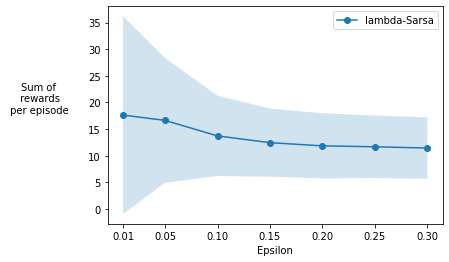

In [11]:
# Plot the results
for algorithm in ["lambda-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,eps)]) for eps in epsilons])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,eps)]) for eps in epsilons])
    plt.plot(epsilons, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(epsilons, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(epsilons)
plt.show()

### Trace decay 

In [12]:
# hyperparameter tuning for trace_decay
trace_decays = [0.3,0.5,0.7,0.9,0.99]

agents = {
    "lambda-Sarsa": SarsaLambdaAgent()}
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["lambda-Sarsa"]:
    for trace_decay in tqdm(trace_decays):
        all_reward_sums[(algorithm,trace_decay)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": 1,"trace_decay": trace_decay,"seed":42}
        agent.agent_init(agent_info)

        for episode in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step(reward, state, action, next_state, next_action)
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,trace_decay)].append(np.sum(reward_sums))

100%|██████████| 5/5 [03:01<00:00, 36.39s/it]


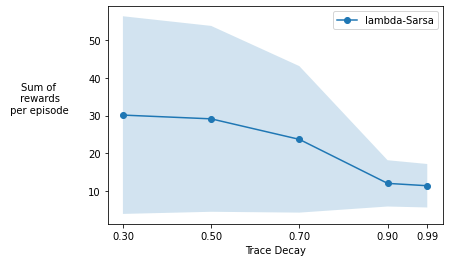

In [13]:
# Plot the results
for algorithm in ["lambda-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,trace_decay)]) for trace_decay in trace_decays])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,trace_decay)]) for trace_decay in trace_decays])
    plt.plot(trace_decays, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(trace_decays, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
    
plt.legend()
plt.xlabel("Trace Decay")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(trace_decays)
plt.show()


### STEPS size

In [14]:
# hyperparameter tuning for step_size
step_sizes = [0.1,0.3,0.5,0.7,0.9]

agents = {
    "lambda-Sarsa": SarsaLambdaAgent()}
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} 

for algorithm in ["lambda-Sarsa"]:
    for step_size in tqdm(step_sizes):
        all_reward_sums[(algorithm,step_size)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": step_size, "discount": 1,"trace_decay": 0.9,"seed":42}
        agent.agent_init(agent_info)

        for episode in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step(reward, state, action, next_state, next_action)
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,step_size)].append(np.sum(reward_sums))


100%|██████████| 5/5 [02:27<00:00, 29.47s/it]


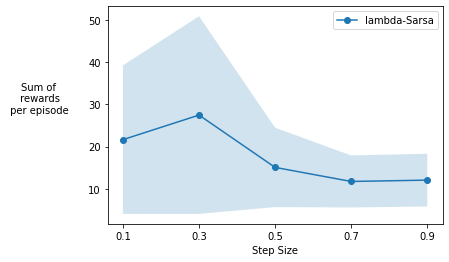

In [15]:
# Plot the results
for algorithm in ["lambda-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,step_size)]) for step_size in step_sizes])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,step_size)]) for step_size in step_sizes])
    plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)
    
plt.legend()
plt.xlabel("Step Size")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()


In [16]:
# hyperparameter tuning for discount
discounts = [0.1,0.3,0.5,0.7,0.9]

agents = {
    "lambda-Sarsa": SarsaLambdaAgent()}
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms

for algorithm in ["lambda-Sarsa"]:
    for discount in tqdm(discounts):
        all_reward_sums[(algorithm,discount)] = []

        agent = agents[algorithm]
        agent_info = {"num_actions": 2, "epsilon": 0.2, "eps_decay":1, "step_size": 0.7, "discount": discount,"trace_decay": 0.9,"seed":42}
        agent.agent_init(agent_info)

        for episode in range(3000):
            
            # Initialize done to False
            done = False
            
            reward_sums = []

            state, info = env.reset()
            while not done:
                action = agent.agent_act(state)
                next_state, reward, done, _, info = env.step(action)
                #For SARSA to acquire the on-policy next action
                next_action = agent.agent_act(next_state)
                
                agent.agent_step(reward, state, action, next_state, next_action)
                state = next_state

                reward_sums.append(reward)

                # If terminal state
                if done:
                    break
            all_reward_sums[(algorithm,discount)].append(np.sum(reward_sums))
            

100%|██████████| 5/5 [03:26<00:00, 41.40s/it]


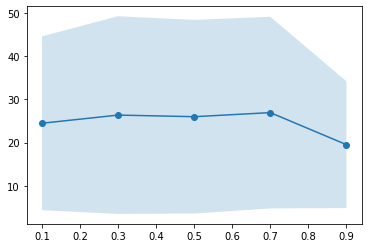

In [17]:
# Plot the results
for algorithm in ["lambda-Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm,discount)]) for discount in discounts])
    algorithm_stds = np.array([np.std(all_reward_sums[(algorithm,discount)]) for discount in discounts])
    plt.plot(discounts, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(discounts, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)

In [19]:
# Best hyperparameter combination

agents = {
    "lambda-Sarsa": SarsaLambdaAgent()}
    

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

all_reward_sums = {} # Contains sum of rewards during episode for both algorithms
all_scores = {} # Contains the scores for during episode for both algorithms
all_q_tables = {}

for algorithm in ["lambda-Sarsa"]:
    all_reward_sums[algorithm] = []
    all_scores[algorithm] = []

    agent = agents[algorithm]
   
    agent_info = {"num_actions": 2, "epsilon": 0.01, "eps_decay":1, "step_size": 0.3, "discount": 0.7, "trace_decay":0.3,"seed":42}

    agent.agent_init(agent_info)

    for run in tqdm(range(10000)):
        
        # Initialize done to False
        done = False
        
        reward_sums = []

        state, info = env.reset()
        while not done:
            action = agent.agent_act(state)
            next_state, reward, done, _, info = env.step(action)
            #For SARSA to acquire the on-policy next action
            next_action = agent.agent_act(next_state)
            
            agent.agent_step(reward, state, action, next_state, next_action)
            state = next_state

            reward_sums.append(reward)

            # If terminal state
            if done:
                break
        all_reward_sums[algorithm].append(np.sum(reward_sums))
        all_q_tables[algorithm] = agent.q
        all_scores[algorithm].append(info["score"])



100%|██████████| 10000/10000 [01:13<00:00, 135.54it/s]


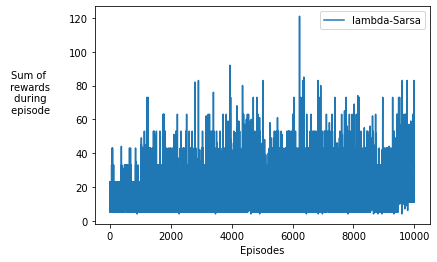

In [20]:
for algorithm in ["lambda-Sarsa"]:
    plt.plot(all_reward_sums[algorithm], label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.legend()
plt.show()

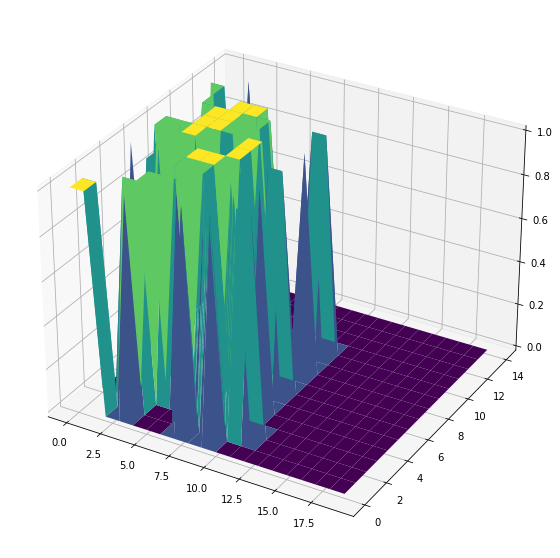

In [38]:
# plot policy in 3D

def plot_policy(agent_q):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, 20, 1)
    y = np.arange(0, 15, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((15,20))
    for i in range(15):
        for j in range(20):
            Z[i][j] = np.argmax(agent_q[(i,j)])
    ax.plot_surface(X, Y, Z, cmap='viridis')
    plt.show()
    
plot_policy(all_q_tables["lambda-Sarsa"])




## PLOTS POLICY 

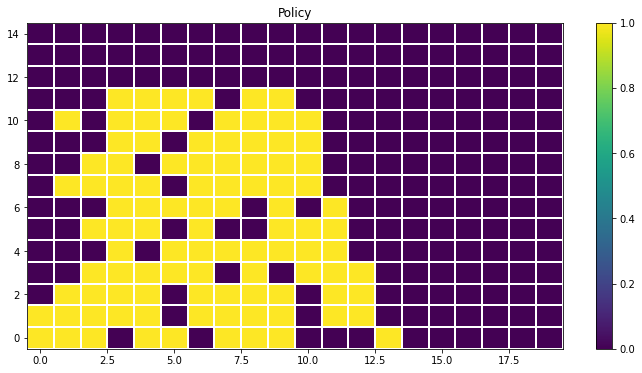

In [31]:
#
def plot_policy(q_values):
    x_range = np.arange(0, 20)
    y_range = np.arange(0, 15)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros((15, 20))
    for i in range(15):
        for j in range(20):
            Z[i][j] = np.argmax(q_values[(j, i)])
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(X, Y, Z, edgecolors='w', linewidth=2)
    plt.colorbar()
    plt.title("Policy")
    plt.show()
plot_policy(SarsaLambda_learning_svf)


# MC CONTROL

In [23]:
def generate_episode_from_Q(env, Q, epsilon, nA):
    """ 
    env : environment
    Q : action value function
    epsilon : proba of random policy
    nA : nber of actions
    """
    episode = []
    state = env.reset()[0]
    while True:
        # draw action following the distribution computed by get_probs, which is equivalent to an epsilon greedy policy
        action = np.random.choice(np.arange(nA), p=get_probs_eps_greedy(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()
        # take a step in the environement 
        next_state, reward, done, _, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode, info["score"]


def argmax(q_values):
        """argmax with random tie-breaking
        """
        ties = np.where(q_values == np.max(q_values))[0]
        return np.random.choice(ties)

def get_probs_eps_greedy(Q_s, epsilon, nA):
    """ Obtains the action probabilities corresponding to an epsilon-greedy policy 
    
    Q_s : array containing action-value functions for this state
    epsilon : proba of random policy
    nA : nber of actions

    Returns : 
    policy_s : dictionary where policy[s] returns the action that the agent chooses after observing state s
    
    """
    policy_s = np.ones(nA) * epsilon/(nA - 1) # proba of taking any action apart from the best one : epsilon / (nA - 1)
    best_a = argmax(Q_s)
    policy_s[best_a] = 1 - epsilon # proba of taking the greedy action : 1 - epsilon
    # so that sum of all probas is 1 - epsilon + (nA - 1)*epsilon/(nA - 1) = 1
    return policy_s # each entry gives the probability of taking action a if we follow an epsilon greedy policy

def update_Q(episode, Q, alpha, gamma):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode) # loop for each step of episode
    # prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]]
        # compute the discounted return at i (MC update!)
        G_i = sum(discounts[:-(i+1)] * rewards[i:])
        Q[state][actions[i]] = old_Q + alpha*(G_i - old_Q)
    return Q

In [24]:
# [Graded]
def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1, eps_decay=.99999, eps_min=0.05):
    start = time.time()
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start

    return_list = []
    score_list = []

    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode, score = generate_episode_from_Q(env, Q, epsilon, nA)
        score_list.append(score)
        # add total return of generated episode to the list
        _, _, rewards = zip(*episode)
        return_list.append(sum(rewards))
        # update the action-value function estimate using the episode
        Q = update_Q(episode, Q, alpha, gamma)
    end = time.time()
    print(f"Duration of training : {end-start}")
    
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,argmax(v)) for k, v in Q.items())
    
    return policy, Q, return_list, score_list

In [30]:
# obtain the estimated optimal policy and action-value function
policy_mc, Q_mc, return_list_mc, score_list_mc = mc_control(env, 100000, 0.02)

Episode 100000/100000.Duration of training : 56.38869857788086


In [34]:
# print mean cumulative reward
print("Mean cumulative reward : ", np.mean(return_list_mc))

Mean cumulative reward :  9.26763


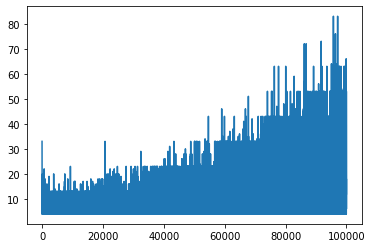

In [41]:
# plot the sum of rewards during episodes
plt.plot(return_list_mc)


In [43]:
# print cumulative reward
print("Mean cumulative reward : ", np.mean(return_list_mc))



Mean cumulative reward :  9.26763


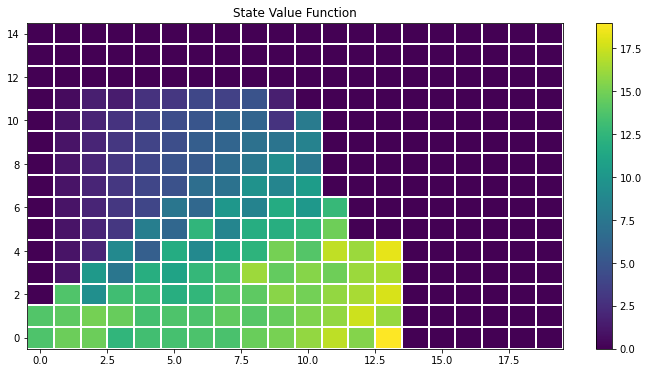

In [40]:
# plot the state value function of MC
plot_state_value(Q_mc)


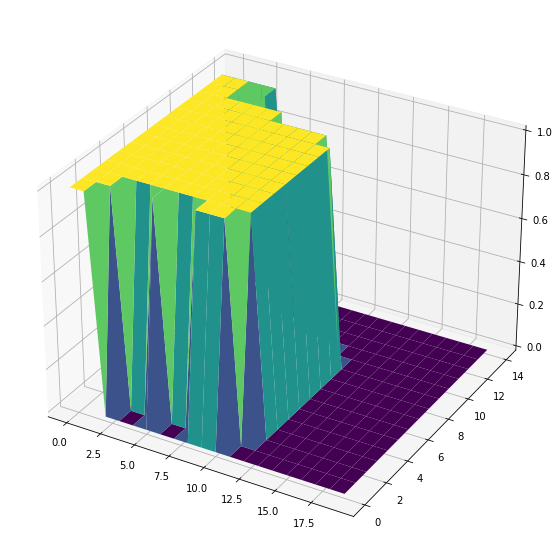

In [39]:
# plot the policy of MC in 3D
plot_policy(Q_mc)
